Import necessary libraries for data handling, analysis and visualisation 

In [25]:
import pandas as pd 
import numpy as np 
import statsmodels
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

Load the energy consumption dataset 

In [86]:
df = pd.read_csv("C:/Users/lavanyagowda/Downloads/Con_hourly.csv")

Preview the first few records of the dataset 

In [27]:
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


Set 'datetime' as the index and convert it to datetime type 

In [28]:
df = df.set_index('Datetime')
df.index  = pd.to_datetime(df.index)

Random sample of 10 records for initial data inspection

In [29]:
df.sample(10)

,AEP_MW
Datetime,
2013-07-24 07:00:00,13820.0
2018-02-01 14:00:00,16465.0
2006-06-05 19:00:00,16622.0
2005-10-31 14:00:00,15465.0
2011-05-11 13:00:00,16322.0
2017-10-11 13:00:00,15779.0
2014-12-12 11:00:00,18200.0
2008-05-13 22:00:00,16130.0
2006-03-02 08:00:00,17063.0


Make a copy of the original data to preserve its state 

In [30]:
data = df.copy()

Print dataset shape, info, basic statistics

In [31]:
df.shape

(121273, 1)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [33]:
df.describe()

,AEP_MW
count,121273.000000
mean,15499.513717
std,2591.399065
min,9581.000000
25%,13630.000000
50%,15310.000000
75%,17200.000000
max,25695.000000


Check for null values 

In [34]:
df.isnull().sum()

AEP_MW    0
dtype: int64

Check the number of unique values in 'AEP_MW' (energy consumption in MW)

In [35]:
df.AEP_MW.nunique()

12643

Visualize the distribution of 'AEP_MW' via boxplot and histogram 

{'whiskers': [<matplotlib.lines.Line2D at 0x1ef75adcdd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1ef75ade850>,
 'boxes': [<matplotlib.lines.Line2D at 0x1ef75adc150>],
 'medians': [<matplotlib.lines.Line2D at 0x1ef75aec0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1ef75aecc10>],
 'means': []}

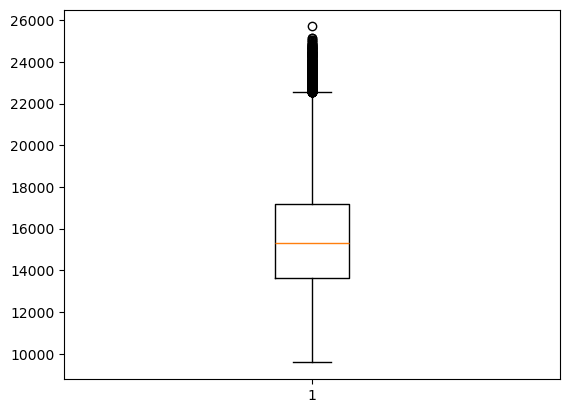

In [36]:
plt.boxplot(df['AEP_MW'])

(array([ 3602., 15690., 24621., 30086., 22238., 14188.,  7396.,  2709.,
          673.,    70.]),
 array([ 9581. , 11192.4, 12803.8, 14415.2, 16026.6, 17638. , 19249.4,
        20860.8, 22472.2, 24083.6, 25695. ]),
 <BarContainer object of 10 artists>)

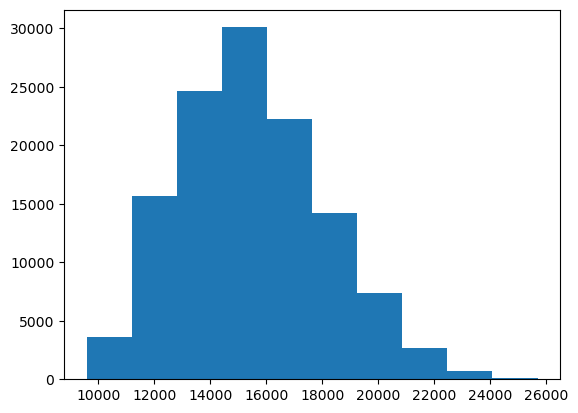

In [37]:
plt.hist(df['AEP_MW'])

Plot the energy consumption over time 

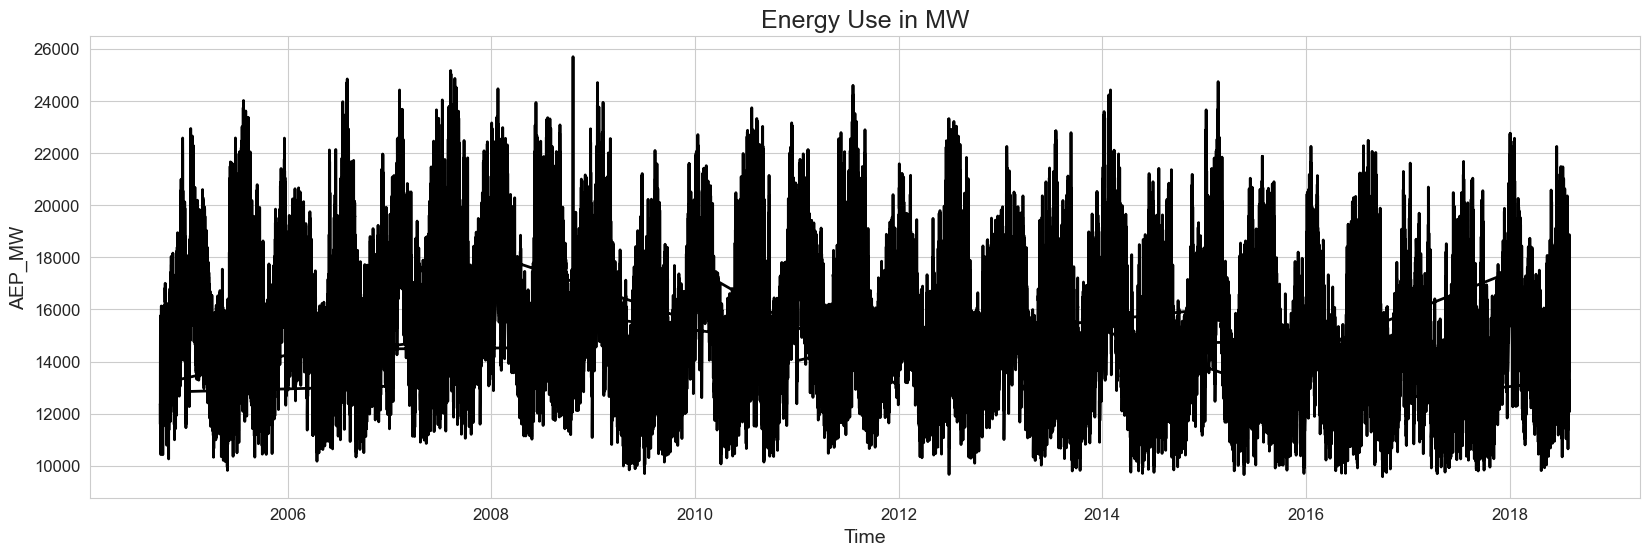

In [38]:
sns.set_style("whitegrid")

fig, ax = plt.subplots(figsize=(20, 6))
ax.plot(df['AEP_MW'], linewidth=2, color='black')

ax.set_title('Energy Use in MW', fontsize=18)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('AEP_MW', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=12)

In [39]:
df['hour'] = df.index.hour

In [40]:
df

,AEP_MW,hour
Datetime,,
2004-12-31 01:00:00,13478.0,1
2004-12-31 02:00:00,12865.0,2
2004-12-31 03:00:00,12577.0,3
2004-12-31 04:00:00,12517.0,4
2004-12-31 05:00:00,12670.0,5
...,...,...
2018-01-01 20:00:00,21089.0,20
2018-01-01 21:00:00,20999.0,21
2018-01-01 22:00:00,20820.0,22


Extract relevant time features from the datetime index

In [41]:
df['dayofweek'] = df.index.dayofweek
df['quarter'] = df.index.quarter 
df['month'] = df.index.month
df['year'] = df.index.year
df['dayofyear'] = df.index.dayofyear
df['dayofmonth'] = df.index.day
df['weekofyear'] = df.index.isocalendar().week

In [42]:
df

,AEP_MW,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
Datetime,,,,,,,,,
2004-12-31 01:00:00,13478.0,1,4,4,12,2004,366,31,53
2004-12-31 02:00:00,12865.0,2,4,4,12,2004,366,31,53
2004-12-31 03:00:00,12577.0,3,4,4,12,2004,366,31,53
2004-12-31 04:00:00,12517.0,4,4,4,12,2004,366,31,53
2004-12-31 05:00:00,12670.0,5,4,4,12,2004,366,31,53
...,...,...,...,...,...,...,...,...,...
2018-01-01 20:00:00,21089.0,20,0,1,1,2018,1,1,1
2018-01-01 21:00:00,20999.0,21,0,1,1,2018,1,1,1
2018-01-01 22:00:00,20820.0,22,0,1,1,2018,1,1,1


In [43]:
df.index = pd.to_datetime(df.index)

In [44]:
df.year.value_counts()

year
2016    8784
2008    8782
2012    8781
2015    8760
2017    8760
2014    8759
2005    8758
2006    8758
2007    8758
2009    8758
2011    8758
2013    8758
2010    8757
2018    5136
2004    2206
Name: count, dtype: int64

In [45]:
df_agg = df.groupby('Datetime').agg({'AEP_MW':'sum'})

In [46]:
df_agg

,AEP_MW
Datetime,
2004-10-01 01:00:00,12379.0
2004-10-01 02:00:00,11935.0
2004-10-01 03:00:00,11692.0
2004-10-01 04:00:00,11597.0
2004-10-01 05:00:00,11681.0
...,...
2018-08-02 20:00:00,17673.0
2018-08-02 21:00:00,17303.0
2018-08-02 22:00:00,17001.0


In [47]:
from sklearn.model_selection import GridSearchCV, TimeSeriesSplit 
import xgboost as xgb

Divide data into training and test sets

In [48]:
train = df.loc[df.index < '01-01-2016']
test = df.loc[df.index >= '01-01-2016']

In [49]:
df.columns

Index(['AEP_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

In [50]:
train.columns

Index(['AEP_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear',
       'dayofmonth', 'weekofyear'],
      dtype='object')

Define the feature set and target variable 

In [51]:
X = df[['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']]

In [52]:
Y = df[['AEP_MW']]

In [53]:
X

,dayofyear,hour,dayofweek,quarter,month,year
Datetime,,,,,,
2004-12-31 01:00:00,366,1,4,4,12,2004
2004-12-31 02:00:00,366,2,4,4,12,2004
2004-12-31 03:00:00,366,3,4,4,12,2004
2004-12-31 04:00:00,366,4,4,4,12,2004
2004-12-31 05:00:00,366,5,4,4,12,2004
...,...,...,...,...,...,...
2018-01-01 20:00:00,1,20,0,1,1,2018
2018-01-01 21:00:00,1,21,0,1,1,2018
2018-01-01 22:00:00,1,22,0,1,1,2018


In [54]:
Y

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


Define the hyperparameter grid for tuning 

In [55]:
#Set up XGBoost model
model = xgb.XGBRegressor()

#Set up hyperparameter grid for tuning
params = {
         'learning_rate': [0.05, 0.1, 0.15],
         'max_depth': [3, 4, 5],
         'subsample': [0.5, 0.6, 0.7],
         'colsample_bytree': [0.5, 0.6, 0.7],
         'n_estimators': [50, 100, 150],
         'objective': ['reg:squarederror']
}

#Set up time series cross-validation
tscv = TimeSeriesSplit(n_splits=5)

#Set up grid search with time series cross-validation
grid_search = GridSearchCV(
    model, param_grid=params, cv=tscv, n_jobs=-1
)

#Fit grid search to data 
grid_search.fit(X,Y)

#Print best hyperparameters and corresponding score 
print('Best hyperparameters: ', grid_search.best_params_)
print('Best score: ', grid_search.best_score_)

Best hyperparameters:  {'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 150, 'objective': 'reg:squarederror', 'subsample': 0.6}
Best score:  0.6229512970750015


In [56]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 

#Split data into training and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

#Set up XGBoost model with hyperparameters
model = xgb.XGBRegressor(**grid_search.best_params_)

#Fit model to training data 
model.fit(X_train, Y_train)

#Make predictions on test set 
Y_pred = model.predict(X_test)

#Calculate MSE and MAE
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_test, Y_pred)

#Print MSE and MAE
print('MSE: ', mse)
print('RMSE: ', rmse)
print('MAE: ', mae)

MSE:  2730594.7026971607
RMSE:  1652.4511196090373
MAE:  1270.287358155857


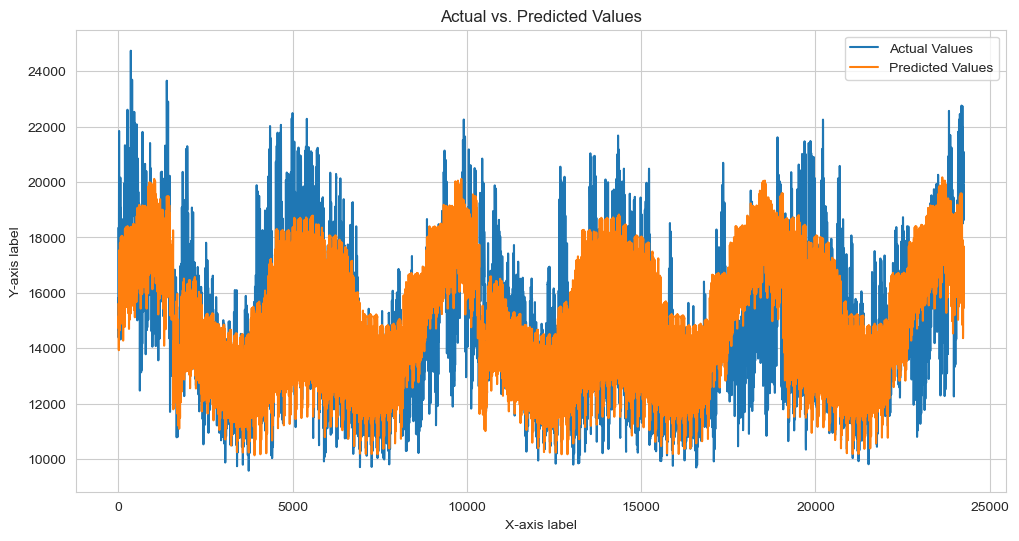

In [57]:
#Create a line plot for actual values 
plt.figure(figsize=(12, 6))
plt.plot(Y_test.values, label='Actual Values')

#Create a line plot for predicted values 
plt.plot(Y_pred, label='Predicted Values')

#Add labels and title
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Actual vs. Predicted Values')

#Add legend 
plt.legend()

#Show the plot 
plt.show()

In [58]:
Y_test.shape

(24255, 1)

In [59]:
Y_pred.shape

(24255,)

In [60]:
best_model = grid_search.best_estimator_

#Get feature importances 
importances = best_model.feature_importances_

#Create a dictionary with feature names and their importances 
feature_importances = dict(zip(X.columns, importances))

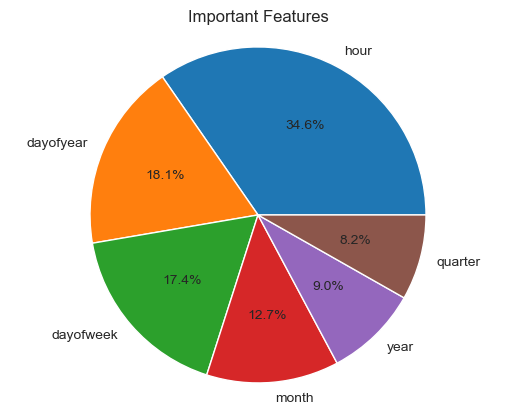

In [61]:
#Sort the feature importances by descending order 
sorted_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

#Get the top 10 features and their importances 
top_features = [x[0] for x in sorted_importances[:10]]
top_importances = [x[1] for x in sorted_importances[:10]]

#Pie chart for the top 10 features 
plt.pie(top_importances, labels=top_features, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Important Features')
plt.show()

ARIMA 

In [62]:
from statsmodels.tsa.arima.model import ARIMA 

In [63]:
data = df['AEP_MW']

In [64]:
#Split data into training and testing sets 
train_size = int(len(data) * 0.8)
train_data, test_data = data.iloc[:train_size], data.iloc[train_size:]

#Fit the ARIMA model to the training data 
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

#Print model summary 
print(model_fit.summary())

#Generate predictions for the test data 
predictions = model_fit.predict(start=len(train_data), end=len(df)-1, typ='levels')

#Calculate error metrics 
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)

#Forecast future 12 values 
forecast = model_fit.forecast(steps=12)
print('Forecasted Values:', forecast)

                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:                97018
Model:                 ARIMA(1, 1, 1)   Log Likelihood             -739972.300
Date:                Wed, 27 Mar 2024   AIC                        1479950.601
Time:                        10:43:34   BIC                        1479979.049
Sample:                             0   HQIC                       1479959.246
                              - 97018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6305      0.003    202.695      0.000       0.624       0.637
ma.L1          0.0054      0.003      1.578      0.114      -0.001       0.012
sigma2      2.468e+05    398.739    618.975      0.0

In [65]:
train_data

Datetime
2004-12-31 01:00:00    13478.0
2004-12-31 02:00:00    12865.0
2004-12-31 03:00:00    12577.0
2004-12-31 04:00:00    12517.0
2004-12-31 05:00:00    12670.0
                        ...   
2015-03-07 04:00:00    17331.0
2015-03-07 05:00:00    17484.0
2015-03-07 06:00:00    17855.0
2015-03-07 07:00:00    18292.0
2015-03-07 08:00:00    18497.0
Name: AEP_MW, Length: 97018, dtype: float64

In [66]:
test_data

Datetime
2015-03-07 09:00:00    18343.0
2015-03-07 10:00:00    17768.0
2015-03-07 11:00:00    17163.0
2015-03-07 12:00:00    16433.0
2015-03-07 13:00:00    15798.0
                        ...   
2018-01-01 20:00:00    21089.0
2018-01-01 21:00:00    20999.0
2018-01-01 22:00:00    20820.0
2018-01-01 23:00:00    20415.0
2018-01-02 00:00:00    19993.0
Name: AEP_MW, Length: 24255, dtype: float64

In [67]:
predictions

97018     18625.872319
97019     18707.129518
97020     18758.364201
97021     18790.668942
97022     18811.037884
              ...     
121268    18845.798339
121269    18845.798339
121270    18845.798339
121271    18845.798339
121272    18845.798339
Name: predicted_mean, Length: 24255, dtype: float64

LSTM

In [77]:
data.head()

Datetime
2004-12-31 01:00:00    13478.0
2004-12-31 02:00:00    12865.0
2004-12-31 03:00:00    12577.0
2004-12-31 04:00:00    12517.0
2004-12-31 05:00:00    12670.0
Name: AEP_MW, dtype: float64

Prepare data for LSTM model

In [98]:
import numpy as np
import pandas as pd

def create_dataset(series, time_steps=1):
    Xs, Ys = [], []
    for i in range(len(series) - time_steps):
        v = series.iloc[i:(i + time_steps)].values
        Xs.append(v)
        Ys.append(series.iloc[i + time_steps])
    return np.array(Xs), np.array(Ys)

# Since `data` is a Series, you directly pass it to the function
time_steps = 24
X, Y = create_dataset(data, time_steps)


In [99]:
X.shape

(121249, 24)

In [100]:
Y.shape

(121249,)

Train the model

In [101]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense

model = Sequential() 
model.add(LSTM(50, activation='relu', input_shape=(24,1))) 
model.add(Dense(1)) 
model.compile(optimizer= 'adam', loss='mse')

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

history = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test), verbose=1)

Epoch 1/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 56s 16ms/step - loss: 38406868.0000 - val_loss: 3058332.7500
Epoch 2/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - loss: 3174622.0000 - val_loss: 2161949.5000
Epoch 3/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 48s 16ms/step - loss: 1847826.3750 - val_loss: 1163657.2500
Epoch 4/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 49s 16ms/step - loss: 1057738.2500 - val_loss: 665553.9375
Epoch 5/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 54s 18ms/step - loss: 647348.7500 - val_loss: 374391.0000
Epoch 6/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 71s 23ms/step - loss: 355570.4375 - val_loss: 251816.4062
Epoch 7/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 58s 15ms/step - loss: 260499.8125 - val_loss: 208325.4219
Epoch 8/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 48s 16ms/step - loss: 211010.2031 - val_loss: 183576.1406
Epoch 9/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 57s 19ms/step - loss: 182011.7031 - val_loss: 200964.6094
Epoch 10/10
3032/3032 ━━━━━━━━━━━━━━━━━━━━ 55s 18ms/step - loss: 164060.0156 - val_loss: 167

In [102]:
yhat = model.predict(X_test)

758/758 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step


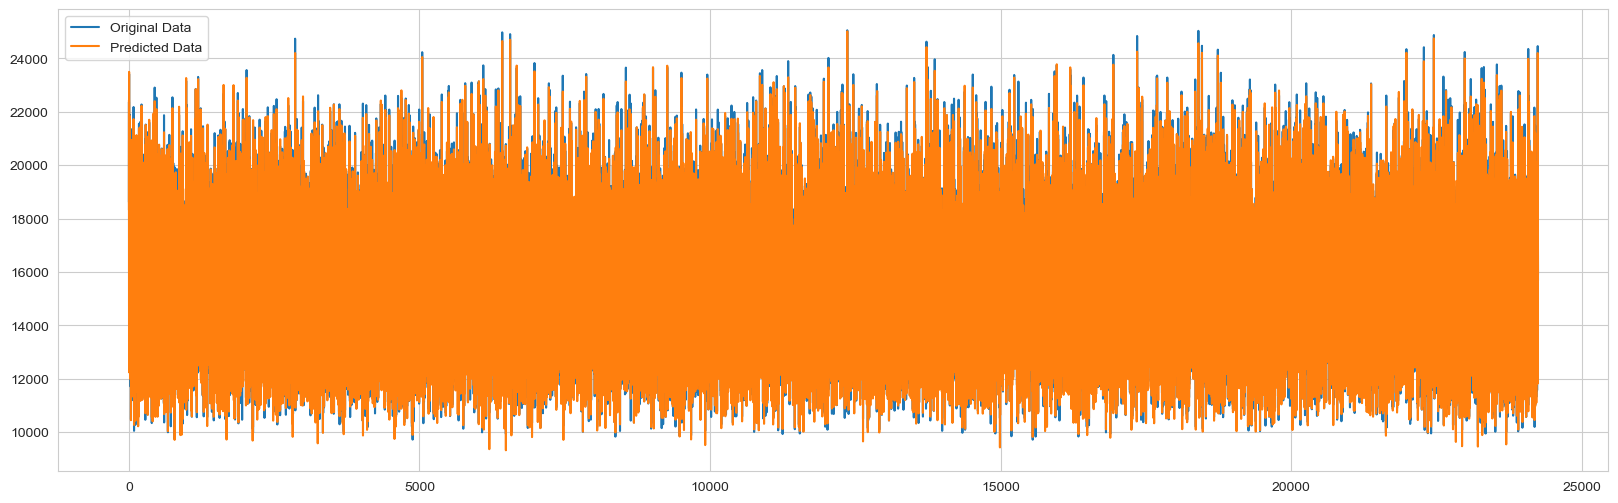

In [105]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
plt.plot(Y_test, label='Original Data')
plt.plot(yhat, label='Predicted Data')
plt.legend()
plt.show()

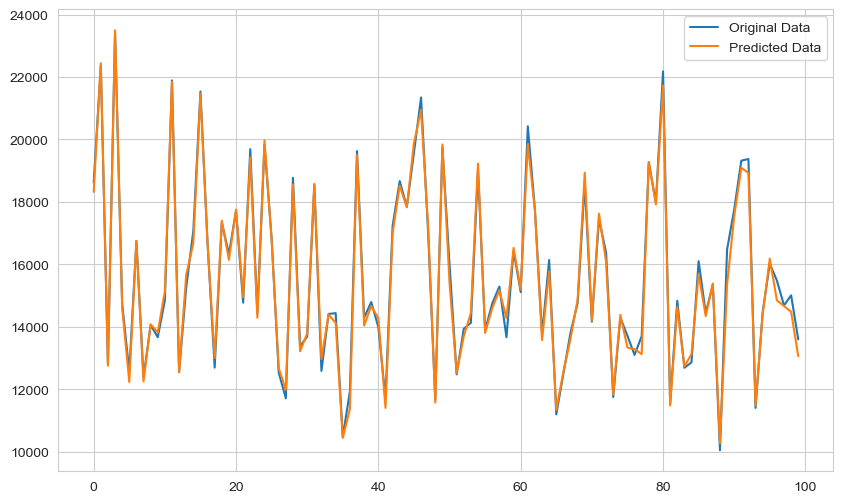

In [106]:
start_idx = 0
end_idx = 100

plt.figure(figsize=(10, 6))
plt.plot(Y_test[start_idx:end_idx], label='Original Data')
plt.plot(yhat[start_idx:end_idx], label='Predicted Data')
plt.legend()
plt.show()

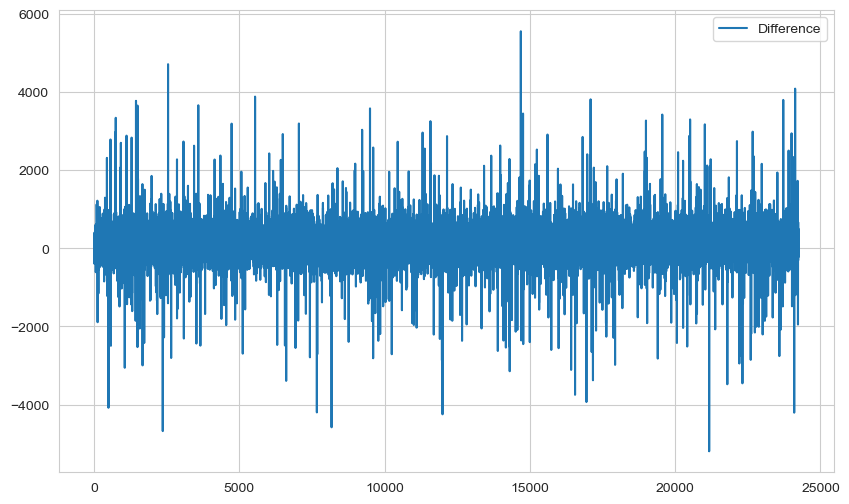

In [107]:
diff = Y_test - yhat.flatten()

plt.figure(figsize=(10, 6))
plt.plot(diff, label='Difference')
plt.legend()
plt.show()